# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** xx

**Author 1 (sciper):** Louis Le Guillouzic (xxxxx)  
**Author 2 (sciper):** Hugo Masson (xxxxx)   
**Author 3 (sciper):** Zhujing Zhang (xxxxx)   

**Release date:** 8.03.2023  
**Due date:** 24.03.2022 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.

[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
print(data_base_path)
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')

if not os.path.exists(tar_path):
    raise Exception('Path to is not valid {}'.format(tar_path))
    
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

../data


---
## Part 1: Segmentation


### 1.0 Intro

In this exercise, you will be given two images. 

* `mucinous_adeno.jpg`: The image depicts a tissue sample from mucinous adenocarcinoma in colorectal cancer. The data is taken from the Cancer Genome Atlas (TCGA) which is an open-source database of different cancer types. Here you can see a tissue taken from a patient and stained using hematoxylin (purple) and eosin (pink) staining. The hematoxylin stains cell nuclei with a purplish blue, and the eosin stains the extracellular matrix and cytoplasm in pink.

* `mucinous_adeno_gt.jpg`: The second image is a coarse annotation of what is regarded as the so-called mucinous area. The mucinous area can be identified as a gray area tainted with purple. The presence of a large amount of mucin is a sign of a defect of normal epithelial cells that start to produce an unreasonable amount of mucin.


### 1.1 Tasks

You will be asked to extract the mucinous area using various approaches:

- [ ] Thresholding
- [ ] Morphology
- [ ] Region growing


### 1.1 Brain image visualization

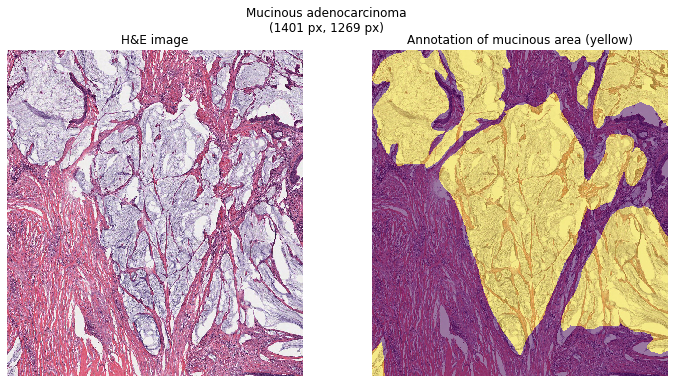

In [2]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load images
path_to_image = os.path.join(data_base_path, data_folder, "mucinous_adeno.jpg")
path_to_gt = os.path.join(data_base_path, data_folder, "mucinous_adeno_gt.jpg")
adeno_img = skimage.io.imread(path_to_image)
adeno_gt = skimage.io.imread(path_to_gt) > 128

# Get size of the image in px
im_h, im_w, im_c = adeno_img.shape

# Display MRI image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot image
ax[0].imshow(adeno_img, interpolation='nearest')
ax[0].set_title('H&E image'.format(im_h, im_w))
ax[0].axis('off')

# Plot image with overlay
ax[1].imshow(adeno_img, interpolation='nearest')
ax[1].imshow(adeno_gt, alpha=0.5, interpolation='nearest')
ax[1].set_title('Annotation of mucinous area (yellow)')
ax[1].axis('off')
plt.suptitle("Mucinous adenocarcinoma\n({} px, {} px)".format(im_h, im_w))
plt.show()

---
### 1.2 Thresholding (4pts)
#### 1.2.1 RGB & Hue (1 pts)

Display the histogram for each channel (R, G, and B) as well as the histogram for the H (hue) channel. Note that you can use [rgb2hsv](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2hsv) to convert an RGB image to an HSV image and then extract the hue.

Text(0, 0.5, 'Pixel count')

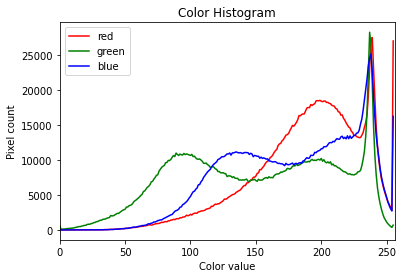

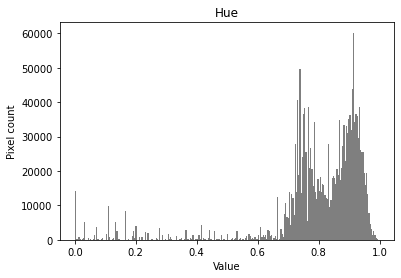

In [4]:
# to do
import matplotlib.pyplot as plt
import numpy as np

# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        adeno_img[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color, label=colors[channel_id])
plt.legend()
plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

#hue histogram

from skimage import color
adeno_hsv = color.rgb2hsv(adeno_img)
adeno_hue= adeno_hsv[...,0]

# pull out just the h channel
plt.figure()
lu=adeno_hsv[...,0].flatten()
plt.hist(lu,256,color='tab:grey')
plt.title("Hue")
plt.xlabel("Value")
plt.ylabel("Pixel count")

#### 1.2.2 Apply Thresholding (2 pts)

For each histogram find the threshold(s) that work the best to isolate the mucinous area. Display the image after thresholding of each channel as well as the error between your prediction ($im$) and the annotations ($gt$) using the formula:

$$error = 1 - \left( \frac{1}{IJ} \sum_{i,j} im_{i,j} == gt_{i, j} \right)$$

Here, I and J are the dimension of the image.

In [ ]:
def calculate_error(mask,gt):
    return 1- (mask==gt).mean()



In [ ]:
best_thresholds= [] #vector to stock the value of threshold

adeno_R = adeno_img[:,:,0]
adeno_G = adeno_img[:,:,1]
adeno_B = adeno_img[:,:,2]

#if we let adeno hue we find a value of threshold around 0.3 wchich is not coherent with our graph above. When we try to reverse the image, we find smth coherent

for image,name in zip([adeno_R, adeno_G, adeno_B, 1-adeno_hue],["red","green","blue","H"]):
# Initialize the variables
    best_error = 1. #error of 1 --> perfect 
    best_th = 0. 
    if name == "H":
        ths = np.linspace(0,1,256)
    else: 
        ths = range(256)
    
#find the threshold the makes the most difference
    for th in ths:
        image_mask = image>th #masking
        
        error = calculate_error(image_mask,adeno_gt)
        if error < best_error: #actualise if we find smth better
            best_th=th
            best_error=error
            
# Save the best threshold
    best_thresholds.append(best_th) #append --> add a value at the end of the vector
    
    
    if name=="H" : print(F"The threshold for the Hue: {best_th:0.4} with an error of {best_error : 0.3}")
    else : print(F"The threshold for the {name} channel: {best_th} with an error of {best_error : 0.4}")

In [ ]:
fig,ax =plt.subplots(2,2)

mask_treshold_R = adeno_R > best_thresholds[0]
ax[0,0].axis("off")
ax[0,0].imshow(mask_treshold_R)
error = calculate_error(mask_treshold_R,adeno_gt)
ax[0,0].set_title(F"Red channel, error of {error:0.3}")

mask_treshold_G = adeno_G > best_thresholds[1]
ax[0,1].axis("off")
ax[0,1].imshow(mask_treshold_G)
error = calculate_error(mask_treshold_G,adeno_gt)
ax[0,1].set_title(F"Green channel, error of {error:0.3}")

mask_treshold_B = adeno_B > best_thresholds[2]
ax[1,0].axis("off")
ax[1,0].imshow(mask_treshold_B)
error = calculate_error(mask_treshold_B,adeno_gt)
ax[1,0].set_title(F"Blue channel, error of {error:0.3}")

mask_treshold_hue = 1-adeno_hue > best_thresholds[3]
ax[1,1].axis("off")
ax[1,1].imshow(mask_treshold_hue)
error = calculate_error(mask_treshold_hue,adeno_gt)
ax[1,1].set_title(F"Hue channel, error of {error:0.3}")

#### 1.2.3 Best Thresholding (1 pts)

Based on your previous findings, set the best threshold(s) and create the final mask as the variable `mask_thesholding`

In [ ]:
# TODO: replace variabel with your own threshod (1- hue)
mask_thesholding = mask_treshold_hue

In [ ]:
# Display MRI image
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# Plot image
ax[0].imshow(adeno_img, interpolation='nearest')
ax[0].set_title('H&E image'.format(im_h, im_w))
ax[0].axis('off')

ax[1].imshow(adeno_img, interpolation='nearest')
ax[1].imshow(adeno_gt, alpha=0.5, interpolation='nearest')
ax[1].set_title('Annotation of mucinous area (yellow)')
ax[1].axis('off')

ax[2].imshow(mask_thesholding, interpolation='nearest')
ax[2].imshow(mask_thesholding, alpha=0.5, interpolation='nearest')
ax[2].set_title('Thresholding')
ax[2].axis('off')

plt.show()

---

### 1.3 Morphology (5pts)

To proceed, use the best results of the previous model (namely `mask_thesholding`) as the starting point. In this exercise we will try to clean the mask using morphology.

* A (2pts): Try the following operation [closing](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.closing), [opening](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.opening) with [disk](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk) size of: $1, 2, 5, 10$. Comment on the quality of the results.

* B (2pts): Try the following operation [remove_small_holes](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_holes), [remove_small_objects](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_objects) with size of: $10, 50, 100, 500$. Comment on the quality of the results.

* C (1pts): Based on your previous results, can you find a combination of the functions that improve your results? Plot the best result along with the error rate. Save the mask as the variable `mask_morph`

In [ ]:
from skimage import morphology

In [ ]:
# A-1 :Closing

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
dsize = [1,2,5,10]

fig.suptitle('Closing')


for i in range(4):

    disksize = skimage.morphology.disk(dsize[i])
    close =skimage.morphology.closing(mask_thesholding, disksize)
    
    ax[i].axis("off")
    ax[i].imshow(close)

    error = calculate_error(close,adeno_gt)
    
    ax[i].set_title(f"Disk of size {dsize[i]}, error of {error:0.2}")

The muscinous expands, and the holes disappear.

In [ ]:
best_closing = 2

In [ ]:
# A-2 :Opening



fig, ax = plt.subplots(1, 4, figsize=(20, 5))
dsize = [1,2,5,10]

fig.suptitle('Opening')


for i in range(4):

    disksize = skimage.morphology.disk(dsize[i])
    opened =skimage.morphology.opening(mask_thesholding, disksize)
    
    ax[i].axis("off")
    ax[i].imshow(opened)

    error = calculate_error(opened,adeno_gt)
    
    ax[i].set_title(f"Disk of size {dsize[i]}, error of {error:0.3}")

The musinous is reduce, the small islands disappear 

In [ ]:
best_opening=2

In [ ]:
# B-1 : Remove small holes

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle('Remove small holes')

dsize = [10, 50, 100, 500]

for i in range(4):

    remove_holes =skimage.morphology.remove_small_holes(mask_thesholding, dsize[i])

     
    ax[i].axis("off")
    ax[i].imshow(remove_holes)

    error = calculate_error(remove_holes,adeno_gt)
    
    ax[i].set_title(f"Removing holes of size {dsize[i]}, error of {error:0.2}")
    

This removes the holes in the mucinous area. The larger diameter gives the best results

In [ ]:
best_remove_hole = 500

In [ ]:
# B-2 : Remove small object

fig, ax = plt.subplots(1, 4, figsize=(20, 5))


fig.suptitle('Remove small holes')

dsize = [10, 50, 100, 500]

for i in range(4):

    remove_objects =skimage.morphology.remove_small_objects(mask_thesholding, dsize[i])

     
    ax[i].axis("off")
    ax[i].imshow(remove_objects)

    error = calculate_error(remove_objects,adeno_gt)
    
    ax[i].set_title(f"Removing holes of size {dsize[i]}, error of {error:0.2}")

This removes impurities from the background. The larger diameter gives the best results

In [ ]:
best_remove_object = 500

In [ ]:
# TODO C 
# Do each function in sequence with the best results obtained as the parameter
mask_morph = np.zeros_like(adeno_gt)

disksize_close = skimage.morphology.disk(best_closing)
disksize_open = skimage.morphology.disk(best_opening)

#closing
skimage.morphology.closing(mask_thesholding, disksize_close,out=mask_morph)
#Opening
skimage.morphology.opening(mask_morph, disksize_open,out=mask_morph)
#Remove holes
mask_morph= skimage.morphology.remove_small_holes(mask_morph, best_remove_hole)
#Remove objects
mask_morph= skimage.morphology.remove_small_objects(mask_morph, best_remove_object)

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

ax[0].imshow(adeno_gt, interpolation='nearest')
ax[0].set_title('Groundtruth')
ax[0].axis('off')

ax[1].imshow(mask_thesholding, interpolation='nearest')
error = calculate_error(mask_thesholding,adeno_gt)
ax[1].set_title(f"Thresholding, error of {error:0.3}")
ax[1].axis('off')

ax[2].imshow(mask_morph, interpolation='nearest')
error = calculate_error(mask_morph,adeno_gt)
ax[2].set_title(f"Combinainon of Morphological operation \n error of {error:0.3}")
ax[2].axis('off')



---
### 1.4 Region growing (5pts)

In this exercise you will implement from scratch your own region growing algorithm. Choose one of the image channel (R/G/B/H) as the source image. You can use multiple seed point to achieve better results. Plot the best result along with the error rate. Save the mask as the variable `mask_region`.

In [ ]:
# TODO

def region_growing(img, seed_point, threshold):
    
    # Create a binary mask for the segmented region
    region_mask = np.zeros_like(img, dtype=bool)
    
    #initialize visited matrix
    visited = np.zeros_like(img, dtype=bool)
    
    # Mark the seed point as part of the region and add it to the queue
    region_mask[seed_point] = True
    queue = [seed_point]
    
    # Define the neighbors
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    # Iteratively add neighboring pixels to the region
    while queue:
        current_point = queue.pop(0)
        
        # Check the neighbors of the current point
        for neighbor in neighbors:
            neighbor_point = (current_point[0] + neighbor[0], current_point[1] + neighbor[1])
            
            # Check if the neighbor is within the image bounds
            if neighbor_point[0] < 0 or neighbor_point[0] >= img.shape[0] or neighbor_point[1] < 0 or neighbor_point[1] >= img.shape[1]:
                continue
            
            # Check if the neighbor is similar to the current point
            if abs(img[current_point] - img[neighbor_point]) > threshold and not region_mask[neighbor_point]:
                # Add the neighbor to the region and the queue
                region_mask[neighbor_point] = True
                queue.append(neighbor_point)
    
    return region_mask

In [ ]:
#we need to find a starting point so we do it by trial and error
import matplotlib.patches as patches

adeno_hsv = color.rgb2hsv(adeno_img)
adeno_hue= adeno_hsv[...,0]

# pull out just the h channel
lu=adeno_hsv[...,0]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the image on the axis
ax.imshow(lu)

# Add a red circle around the specified point
x, y = 600, 600  # replace with the coordinates of your point
r = 15  # replace with the radius of the circle you want
circle = patches.Circle((x, y), radius=r, linewidth=1, edgecolor='red', facecolor='none')
ax.add_patch(circle)

# Show the plot
plt.show()

#test if the desired point verify the condition of threshold : 

seed = (x,y)

print("Check if the seed is True in the ground truth :")
print(adeno_gt[seed])

print("Check hue value of the seed :")
print(1-adeno_hue[seed]>best_thresholds[3])

In [ ]:
print("Now we can call the function with the seed point")
mask_region = np.zeros_like(adeno_gt)
mask_region = region_growing(1-adeno_hue, seed, 0.2)

#show adeno_gt and adeno_img
fig,axs=plt.subplots(1,2,figsize=(12,6))
axs[0].imshow(adeno_gt)
axs[1].imshow(mask_region)

---
### 1.5 Method comparison (1pt)

In this section we display the overall outputs. Please make sure that you create the variables `mask_thesholding`, `mask_morph`, and `mask_region` to properly display the output. Comment on the results and what you think would be the best approach.

In [ ]:
# Add your comments here

In [ ]:
error_th = 1- (mask_thesholding == adeno_gt).mean()
error_morph = 1- (mask_morph == adeno_gt).mean()
error_region = 1- (mask_region == adeno_gt).mean()


# Display MRI image
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# Plot image
ax[0, 0].imshow(adeno_img, interpolation='nearest')
ax[0, 0].set_title('H&E image'.format(im_h, im_w))

# Plot image with overlay
ax[0, 1].imshow(adeno_gt, interpolation='nearest')
ax[0, 1].set_title('Annotation')

# Plot estimation using thresholding
ax[1, 0].imshow(mask_thesholding, interpolation='nearest')
ax[1, 0].set_title('Thresholding\nerror: {:.3f}'.format(error_th))

# Plot estimation using Contour detection
ax[1, 1].imshow(mask_morph, interpolation='nearest')
ax[1, 1].set_title('Morphology\nerror: {:.3f}'.format(error_morph))


# Plot estimation using Region growing
ax[1, 2].imshow(mask_region, interpolation='nearest')
ax[1, 2].set_title('Region growing\nerror: {:.3f}'.format(error_region))


[a.axis('off') for a in ax.ravel()]


plt.suptitle("Final results")
plt.show()

Tresholding is a very good starting point for this kind of problem. The hue was a good reference because there was no big difference in the basic colours.
We can see that with Morphological mask, we have succeeded in considerably reducing the error (especially thanks to the suppression of noises such as small holes and small objects). 
Region Grown ...

# ---
## Part 2: Axon segmentations (10 points)

#### Intro 

Axon segmentation is vital to neuroscience research as it enables the study of neurons' morphology and connectivity. We will conduct two exercises to evaluate the impact of your segmentation algorithms under different independent artefacts. Each exercise consists of a synthetic **Ground Truth (GT)** and two more images simulating a specific artifact.

The **Ground Truth**  has tree main compartments. 1) The inner part of the axon. 2) The outer layer of the axon (called myelin) and the extracellular slace (the background of the image). 

The task consists into segmenting the three main compartments in the image to compute the inner-axon and outer-axon radii distribution.


To compute the radii, we suggest the following approximation.
$$\hat{r}_{I}= \sqrt{\frac{A_{yellow}}{\pi}}$$
$$\hat{r}_{O}= \sqrt{\frac{A_{yellow} + A_{blue}}{\pi}}$$
Where **A** is the corresponding area of the comparments. 
**Using this image as reference** 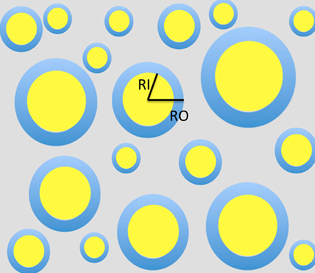

#### Artifacts simulated:

Excercise 1) Two images with different levels of SNR (signal to noise ratio). The images have rician noise.
Exercise  2) Two images adquired using a fraction of the fourier space. Only Lowest frequency are used to reconstruct the image. (simulating fast aquisitions in MRI)

Ensure your algorithm works on the GT before you go to the test cases with artifacts. Apply any preprocessing needed to the image. The preprocessing can be different for each type of image.

### Tasks

For each exercise we ask to:

1) Segment the images with the following colors: blue the inner part of the axon, red the outer part of the axon (myelin) and white for the backround(example) 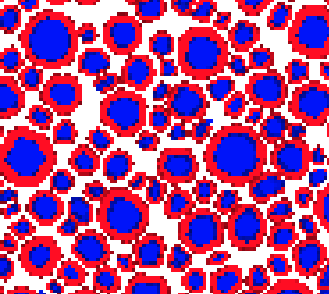

2) Count the number of axons obtained in the sample, calculate the radii for each axons, and display a radii histogram for the each of the images(GT and test cases).

In the exercises, assume that each pixel side is $(0.1 \mu m)$, i.e. a pixel has an area of $(0.01 \mu m^2 )$

## Grading 
The answers does not have to be perfect, they just be a good approximation.

1. Developing an algorithm that works for the two GT images. **(3 points)** 
2. Use preprosesing to prepare the images with SNR and the Low frequencies.  (**1 point** for SNR preprocesing , **1 point** for Low-frequency images preprocesing)
3. Running the algorithm in the test images. **1/2 point** SNR, **1/2 point** Low freqs
4. Computing and plotting radii distributions **(1 point)**
5. Explaining and discussing your implementation. **(3 points )**
    Try to be specific, not necessarily long. In the discussion include:
 1. What worked? 
 2. What did not work?
 3. Why do you think it does not work? 
 4. How could you improve your algorithms as future work?  Try to avoid general comments like "using deep learning" 
 
**Extra points: Real data example (3 points), the algorithm should display a _good enough_ segmentation.**

### 2.1 SNR

In [24]:
data_base_path


'../data'

../data


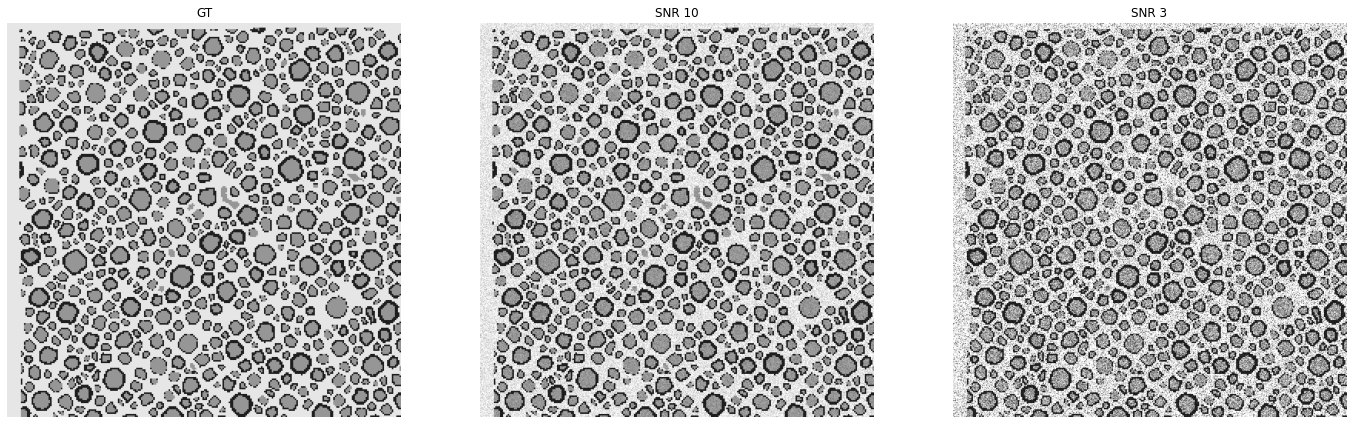

In [30]:
import cv2
import matplotlib.pyplot as plt

data_base_path = os.path.join(os.pardir, 'data')
print(data_base_path)
data_folder = 'lab-01-data'

path_folder = os.path.join(data_base_path, data_folder) + '/' 

files = ["GT_0.png"  , "test_0_0.png" , "test_0_1.png"]
gt_0 = cv2.imread(path_folder+ files[0])
snr_10 = cv2.imread(path_folder+ files[1])
snr_3 = cv2.imread(path_folder+ files[2])

images = [gt_0 , snr_10, snr_3]
im_names = ["GT" , "SNR 10" , "SNR 3"]
fig, axes = plt.subplots(1, 3, figsize=(24, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im[0:512,0:512])
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.1.1 Preprocessing 

 % add your images after preprocessing


Assert that is only grey value 

In [26]:
assert(np.array_equal(gt_0[:,:,0],gt_0[:,:,1]))
assert(np.array_equal(gt_0[:,:,1],gt_0[:,:,2]))

assert(np.array_equal(snr_10[:,:,0],snr_10[:,:,1]))
assert(np.array_equal(snr_10[:,:,1],snr_10[:,:,2]))

assert(np.array_equal(snr_3[:,:,0],snr_3[:,:,1]))
assert(np.array_equal(snr_3[:,:,1],snr_3[:,:,2]))

In [27]:
gt_0_2D=gt_0[:,:,0]
snr_3_2D=snr_3[:,:,1]
snr_10_2D=snr_10[:,:,2]


(-0.5, 1023.5, 1023.5, -0.5)

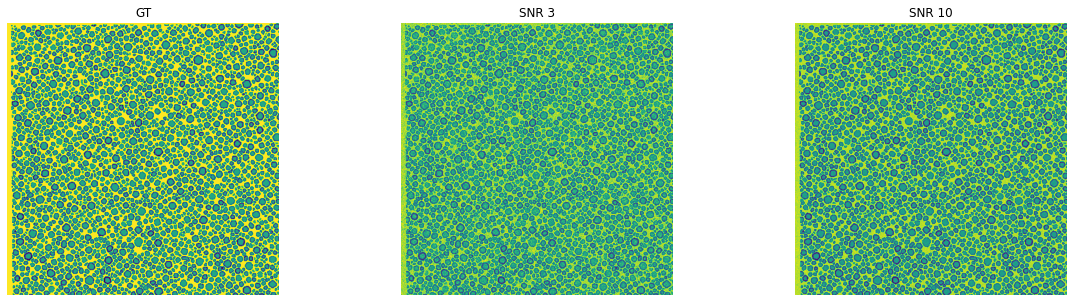

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].imshow(gt_0_2D)
ax[0].set_title('GT')
ax[0].axis('off')

ax[1].imshow(snr_3_2D)
ax[1].set_title(f"SNR 3")
ax[1].axis('off')

ax[2].imshow(snr_10_2D)
ax[2].set_title(f"SNR 10")
ax[2].axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

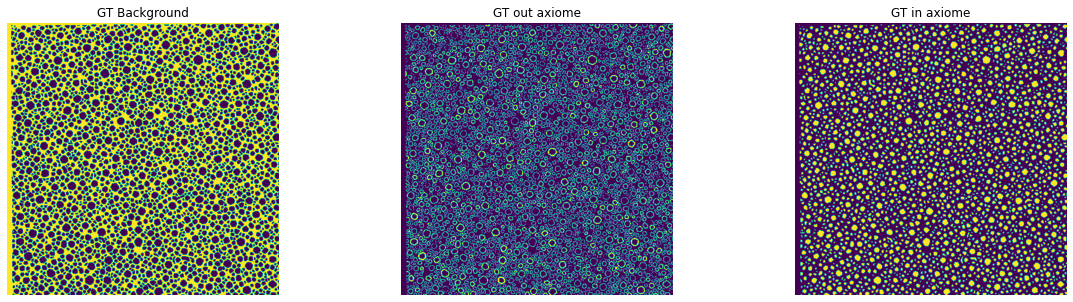

In [7]:

# 30 --> out axiome ; 150 _> in axiom , 230 --> background
grey_value = np.unique(gt_0_2D)
gt_out = gt_0_2D ==grey_value[0]
gt_in = gt_0_2D ==grey_value[1]
gt_background = gt_0_2D ==grey_value[2]

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].imshow(gt_background)
ax[0].set_title('GT Background')
ax[0].axis('off')

ax[1].imshow(gt_out)
ax[1].set_title(f"GT out axiome")
ax[1].axis('off')

ax[2].imshow(gt_in)
ax[2].set_title(f"GT in axiome")
ax[2].axis('off')


In [8]:
lower = np.array([28])
upper = np.array([32])
mask = cv2.inRange(gt_0_2D, lower, upper)


In [9]:
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)


In [10]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
num_axons = len(contours)
print(num_axons)


2541


(-0.5, 1023.5, 1023.5, -0.5)

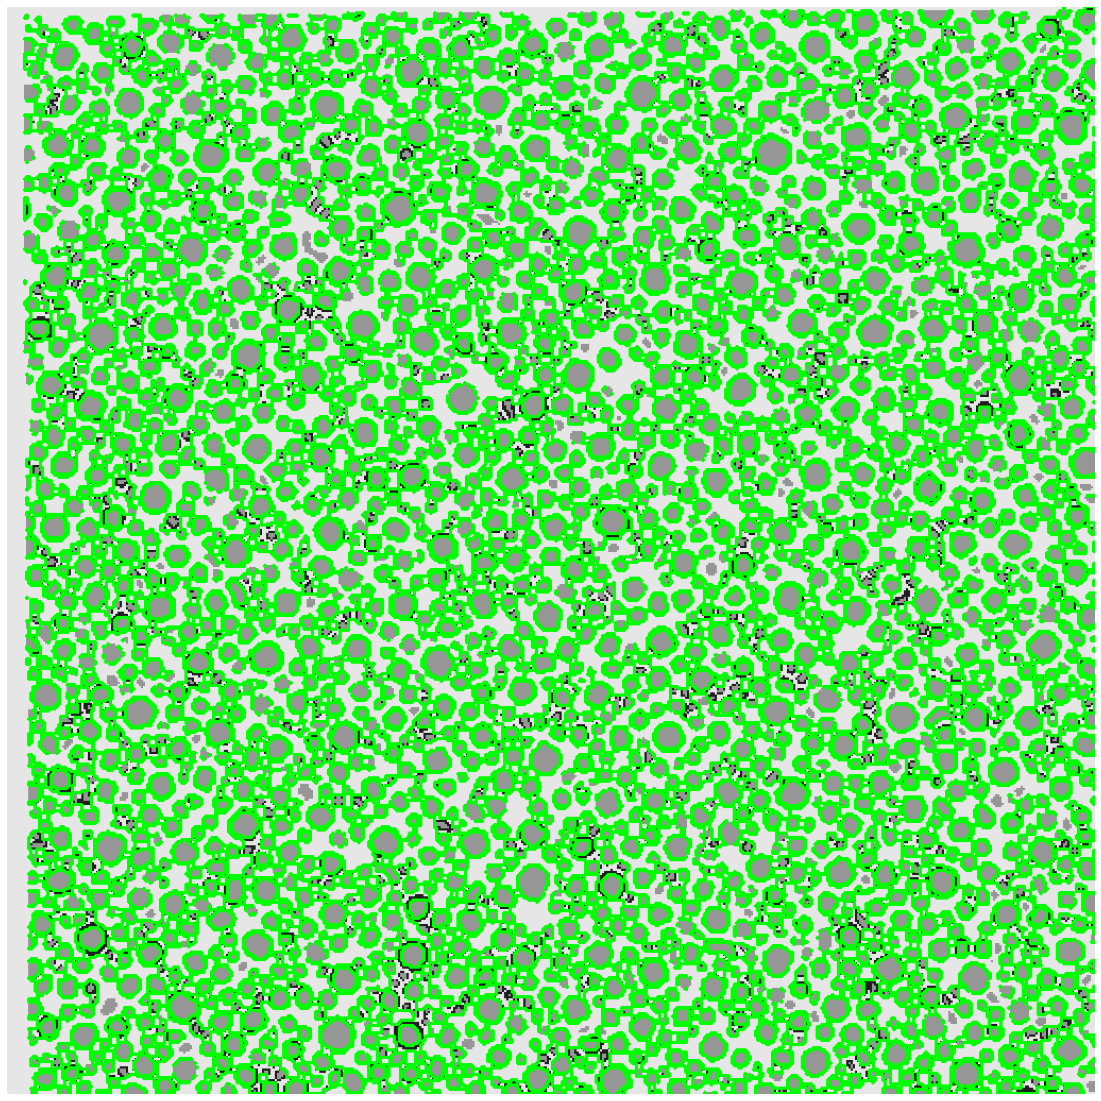

In [22]:
cv2.drawContours(gt_0, contours, -1, (0,255,0), 2)
fig,ax=plt.subplots(1,figsize=(20, 20))
ax.imshow(gt_0)
ax.axis("off")



In [38]:
circles = cv2.HoughCircles(gt_in, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'HoughCircles'
> Overload resolution failed:
>  - image data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'image'


In [39]:
gt_in

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [40]:
import cv2
import numpy as np

# Lire l'image
img = gt_0.copy

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer un filtre pour lisser l'image et supprimer le bruit
gray_blur = cv2.medianBlur(gray, 5)

# Utiliser la fonction cv2.HoughCircles pour détecter les cercles dans l'image
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)




In [42]:

# Si des cercles sont détectés
if circles is not None:
    # Convertir les coordonnées des cercles (x, y) en entiers
    circles = np.round(circles[0, :]).astype("int")
    # Initialiser une liste pour stocker les rayons des cercles
    radii = []
    # Parcourir tous les cercles détectés
    for (x, y, r) in circles:
        # Ajouter le rayon du cercle à la liste
        radii.append(r)
        
    # Afficher le nombre de cercles détectés et leur rayon
    print("Nombre de cercles détectés :", len(circles))
    print("Rayons des cercles :", radii)
else:
    # Aucun cercle détecté
    print("Aucun cercle détecté")


Nombre de cercles détectés : 1396
Rayons des cercles : [252, 221, 211, 210, 199, 214, 212, 195, 200, 188, 170, 199, 188, 186, 184, 158, 175, 172, 178, 172, 189, 172, 170, 172, 166, 327, 162, 159, 168, 161, 156, 157, 156, 152, 138, 160, 290, 138, 140, 135, 151, 142, 278, 124, 144, 145, 141, 137, 297, 138, 137, 133, 132, 139, 138, 128, 134, 235, 133, 121, 138, 136, 130, 121, 118, 128, 132, 114, 135, 130, 123, 117, 131, 246, 117, 109, 107, 121, 116, 121, 115, 114, 111, 104, 118, 120, 248, 119, 106, 102, 118, 115, 261, 124, 124, 113, 109, 107, 107, 98, 248, 227, 121, 118, 106, 116, 105, 103, 115, 113, 105, 188, 107, 105, 99, 115, 109, 108, 107, 104, 111, 109, 107, 216, 104, 115, 108, 99, 214, 103, 100, 103, 111, 105, 101, 94, 111, 109, 99, 109, 107, 93, 99, 107, 102, 101, 100, 96, 111, 83, 206, 106, 96, 100, 97, 97, 94, 87, 104, 96, 102, 94, 90, 90, 104, 99, 92, 91, 203, 100, 96, 91, 96, 84, 98, 89, 87, 85, 95, 92, 89, 84, 176, 98, 95, 91, 87, 94, 91, 88, 96, 90, 82, 96, 84, 191, 86, 185, 

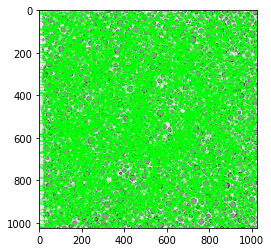

In [44]:
# Afficher l'image avec les cercles dessinés
plt.imshow(gt_0)


### 2.1.2 Results Segmetations

In [ ]:
images = [gt_0 , snr_10, snr_3]
im_names = ["GT" , "SNR 10" , "SNR 3"]
fig, axes = plt.subplots(1, 3, figsize=(24, 24))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(255- im[0:512,0:512])
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.1.3 Radii histrograms 

In [ ]:
## results Radii distribution. proposal feel free to change it
import numpy as np


rads_outer = np.random.normal(0, 1, 200)
rads_inner = np.random.normal(0, 1, 200)


rads_gt = [ rads_inner ,rads_outer]
rads_test0 = [ rads_inner ,rads_outer]  # your result
rads_test1 = [ rads_inner ,rads_outer]  # your result

all_rads= [rads_gt , rads_test0 , rads_test1] 

images = [gt_0 , snr_10, snr_3]
im_names = ["GT" , "SNR 10" , "SNR 3"]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, rads, nm in zip(axes.ravel(), all_rads, im_names):
    ax.hist(rads[0]  , color = "red" , label = "inner" ,alpha= 0.5)
    ax.hist(rads[1]  , color = "blue" , label = "outer" ,alpha= 0.5)
    ax.legend()
    ax.set_title(nm)
plt.show()


### 2.2 Low frequencies

In [ ]:

files = ["GT_3.png"  , "test_3_0.png" , "test_3_1.png"]
path = "data/"
gt_3 = cv2.imread(path_folder+ files[0])
lowfreq0 = cv2.imread(path_folder+ files[1])
lowfreq1 = cv2.imread(path_folder+ files[2])

images = [gt_3 , lowfreq0, lowfreq1]
im_names = ["GT" , "Low " , "Lower"]
fig, axes = plt.subplots(1, 3, figsize=(24, 24))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im[0:512,0:512])
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2.1 Preprocessing

### 2.2.2 Results Segmetations

### 2.2.3 Radii histrograms


### 2.5 Not mandatory exercise, Real data ( 3 points )

The points are given just by having a good enough segmentation.

In [ ]:
# Add your implementation and discussion
import cv2

files = ["extra_point.png" ]
real_data = cv2.imread(path_folder+ files[0])

plt.imshow(real_data[:256, :256])